### 탐색적 데이터 분석
- 전박적으로 데이터를 이해하기 위한 데이터 탐색 과정을 탐색적 데이터 분석이라함 
- 탐색적 데이터 분석을 통해 데이터의 분포 및 특성 등에 대한 정보 파악

In [1]:
from matplotlib import font_manager, rc 
import matplotlib  
import matplotlib.pyplot as plt   
import seaborn as sns 
import pandas as pd 
import numpy as np 
import platform

In [2]:
if platform.system() == 'Windows' : 
    font_name = font_manager.FontProperties(fname="c:/windows/Fonts/malgun.ttf").get_name()
    rc('font', family = font_name)

In [3]:
matplotlib.rcParams['axes.unicode_minus'] = False

### 프리시즌 데이터 분석
- 한국 프로야구는 시즌 개막 전 약 2주동안 프리시즌 
- 팀별로 5개 팀과 2차전까지 10경기 
- 리그 전체 50경기 진행

In [4]:
preseason_df = pd.read_csv("../ch01/data/Pre_Season_Batter.csv")
regular_season_df = pd.read_csv("../ch01/data/Regular_Season_Batter.csv")
 
print(preseason_df.shape)
print(regular_season_df.head())

(1393, 29)
   batter_id batter_name  year team    avg    G   AB   R   H  2B  ...  GDP  \
0          0        가르시아  2018   LG  0.339   50  183  27  62   9  ...    3   
1          1         강경학  2011   한화  0.000    2    1   0   0   0  ...    0   
2          1         강경학  2014   한화  0.221   41   86  11  19   2  ...    1   
3          1         강경학  2015   한화  0.257  120  311  50  80   7  ...    3   
4          1         강경학  2016   한화  0.158   46  101  16  16   3  ...    5   

     SLG    OBP   E  height/weight      year_born   position  \
0  0.519  0.383   9     177cm/93kg  1985년 04월 12일  내야수(우투우타)   
1  0.000  0.000   1     180cm/72kg  1992년 08월 11일  내야수(우투좌타)   
2  0.349  0.337   6     180cm/72kg  1992년 08월 11일  내야수(우투좌타)   
3  0.325  0.348  15     180cm/72kg  1992년 08월 11일  내야수(우투좌타)   
4  0.257  0.232   7     180cm/72kg  1992년 08월 11일  내야수(우투좌타)   

                                   career  starting_salary    OPS  
0  쿠바 Ciego de Avila Maximo Gomez Baez(대)              NaN  0.902  

In [5]:
# 데이타 기초통계량 확인
display(preseason_df.describe())

,batter_id,year,G,AB,R,H,2B,3B,HR,TB,...,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,...,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1393.000000,1364.000000,1368.000000,1393.000000,1364.000000
mean,173.434314,2013.014358,8.705671,19.201723,2.679828,5.021536,0.954774,0.119885,0.391960,7.391960,...,0.629576,0.291457,1.877961,0.330223,3.714286,0.447236,0.361012,0.317912,0.381910,0.676924
std,94.716851,4.166757,5.562686,13.395946,2.637212,4.232584,1.196904,0.379976,0.748557,6.538787,...,1.146854,0.595522,2.053392,0.642204,3.180884,0.723364,0.269892,0.151489,0.729521,0.386933
min,0.000000,2002.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,99.000000,2010.000000,6.000000,9.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.217000,0.250000,0.000000,0.472000
50%,178.000000,2014.000000,9.000000,18.000000,2.000000,4.000000,1.000000,0.000000,0.000000,6.000000,...,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.344500,0.333000,0.000000,0.675000
75%,254.000000,2017.000000,11.000000,28.000000,4.000000,8.000000,2.000000,0.000000,1.000000,11.000000,...,1.000000,0.000000,3.000000,1.000000,5.000000,1.000000,0.478000,0.400000,1.000000,0.867000
max,344.000000,2018.000000,119.000000,183.000000,35.000000,51.000000,11.000000,4.000000,5.000000,68.000000,...,9.000000,4.000000,21.000000,4.000000,36.000000,5.000000,4.000000,1.000000,5.000000,5.000000


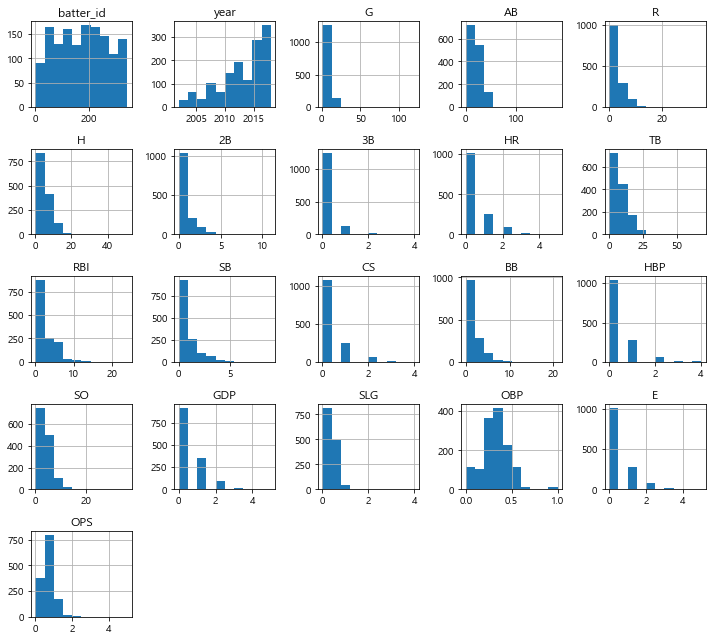

In [6]:
# 데이터 시각화 
preseason_df.hist(figsize=(10, 9))
plt.tight_layout() # 그래프 간격 설정 
plt.show()

In [7]:
# 정규시즌 데이터에서 2002년 이후의 연도별 기록된 선수의 수
regular_count = regular_season_df.groupby('year')['batter_id'].count().rename('regular')

# 프리시즌 데이터에서 연도별 기록된 선수의 수
preseason_count = preseason_df.groupby('year')['batter_id'].count().rename('preseason')
pd.concat([regular_count, preseason_count, np.round(preseason_count/regular_count,2).rename('ratio')],
            axis = 1).transpose().loc[:, 2002:]

year,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
regular,43.00,54.00,68.00,73.00,85.00,98.00,115.00,124.00,130.00,151.0,174.0,194.00,186.00,207.00,213.00,217.00,227.0
preseason,12.00,19.00,28.00,37.00,36.00,43.00,61.00,66.00,72.00,75.0,87.0,104.00,117.00,134.00,153.00,167.00,182.0
ratio,0.28,0.35,0.41,0.51,0.42,0.44,0.53,0.53,0.55,0.5,0.5,0.54,0.63,0.65,0.72,0.77,0.8


### 프리시즌의 성적과 정규시즌의 성적 간 상관관계 파악
- 두 데이터 성적 비교하기 위해 공통으로 존재하는 선수들의 기록만 사용
- 선수와 연도 데이터를 이용해 새로운 열을 생성하고 교집합을 이용해 공통 선수 불러오는 방식 

In [8]:
# 타자의 이름과 연도를 이용해 새로운 인덱스 생성
regular_season_df['new_idx'] = regular_season_df['batter_name'] + regular_season_df['year'].apply(str)
preseason_df['new_idx'] = preseason_df['batter_name'] + preseason_df['year'].apply(str) 

# 새로운 인덱스의 교집합
intersection_idx = list(set(regular_season_df['new_idx']).intersection(preseason_df['new_idx']))

# 교집합에 존재하는 데이터만 불러오기
regular_season_new = regular_season_df.loc[
    regular_season_df['new_idx'].apply(lambda x : x in intersection_idx)].copy()
regular_season_new = regular_season_new.sort_values(by = 'new_idx').reset_index(drop=True)

# 비교를 위해 인덱스로 정렬
preseason_new = preseason_df.loc[preseason_df['new_idx'].apply(
    lambda x : x in intersection_idx)].copy()
preseason_new = preseason_new.sort_values(by = 'new_idx').reset_index(drop=True)

# 검정 코드
print(regular_season_new.shape, preseason_new.shape)
sum(regular_season_new['new_idx'] == preseason_new['new_idx'])


(1358, 30) (1358, 30)


1358

c:\Users\jswoo\Desktop\Repository\Study_Data_Science\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


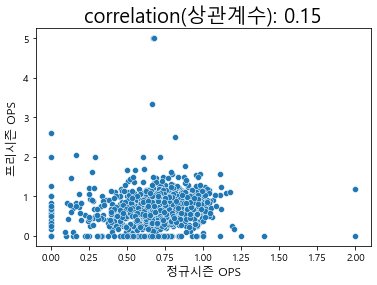

In [9]:
# 정규시즌과 프리시즌의 상관관계 계산
correlation = regular_season_new['OPS'].corr(preseason_new['OPS'])
sns.scatterplot(regular_season_new['OPS'], preseason_new['OPS'])
plt.title('correlation(상관계수): ' + str(np.round(correlation, 2)), fontsize = 20)
plt.xlabel('정규시즌 OPS', fontsize = 12)
plt.ylabel('프리시즌 OPS', fontsize = 12)
plt.show()

### 상관관계 해석
- 선형적인 모습을 보이고 있지 않다 -> 상관성이 매우 낮다 
- 프리시즌 데이터의 경기 수는 적으므로 정규시즌 데이터와 구성 차이가 발생할 수 있다는 점
- 이러한 결과로 프리시즌 데이터를 분석에서 제외


### 정규시즌 데이터 분석
- 정규시즌 데티너는 연도별로 선수의 종합 기록을 보유하고 있는 데이터

In [10]:
regular_season_df = pd.read_csv('../ch01/data/Regular_Season_Batter.csv')
display(regular_season_df.shape, regular_season_df.head())
regular_season_df.describe()

(2454, 29)

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,1,0.349,0.337,6,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.686
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,3,0.325,0.348,15,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.673
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,5,0.257,0.232,7,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.489


,batter_id,year,avg,G,AB,R,H,2B,3B,HR,...,SB,CS,BB,HBP,SO,GDP,SLG,OBP,E,OPS
count,2454.000000,2454.000000,2428.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,...,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2454.000000,2428.000000,2430.000000,2454.000000,2428.000000
mean,178.079462,2011.614507,0.237559,72.535045,201.514670,29.912388,55.988183,9.863488,0.957620,5.504075,...,5.290139,2.335778,20.943765,3.424613,38.596985,4.603504,0.343826,0.306684,3.676447,0.649939
std,97.557947,4.992833,0.098440,45.093871,169.537029,28.778759,52.253844,9.871314,1.647193,7.989380,...,9.088580,3.194045,21.206113,4.132614,31.801466,4.713531,0.163335,0.111778,4.585248,0.261634
min,0.000000,1993.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,101.250000,2008.000000,0.203000,28.000000,38.250000,5.000000,8.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,3.000000,0.000000,10.000000,1.000000,0.267454,0.272727,0.000000,0.546000
50%,183.000000,2013.000000,0.255000,79.000000,163.000000,21.000000,40.000000,7.000000,0.000000,2.000000,...,2.000000,1.000000,14.000000,2.000000,33.000000,3.000000,0.360124,0.328592,2.000000,0.688637
75%,265.000000,2016.000000,0.291000,115.000000,357.500000,49.000000,100.000000,16.000000,1.000000,8.000000,...,6.000000,3.000000,34.000000,5.000000,60.000000,7.000000,0.436000,0.367000,5.000000,0.797234
max,344.000000,2018.000000,1.000000,144.000000,600.000000,135.000000,201.000000,47.000000,17.000000,53.000000,...,84.000000,21.000000,108.000000,27.000000,161.000000,24.000000,3.000000,1.000000,30.000000,4.000000


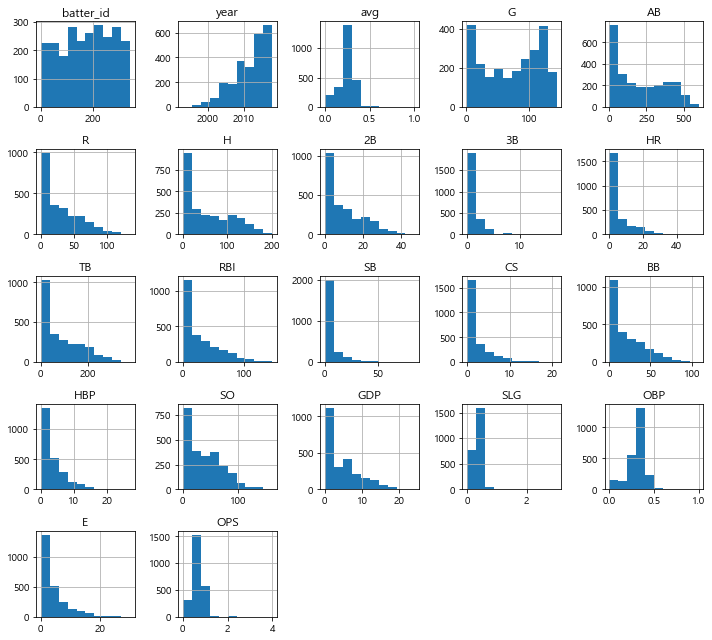

In [11]:
regular_season_df.hist(figsize = (10, 9))
plt.tight_layout()
plt.show()

- OPS는 예측 대상이 되는 중요한 변수이므로 상자그림(box plot)로 확인

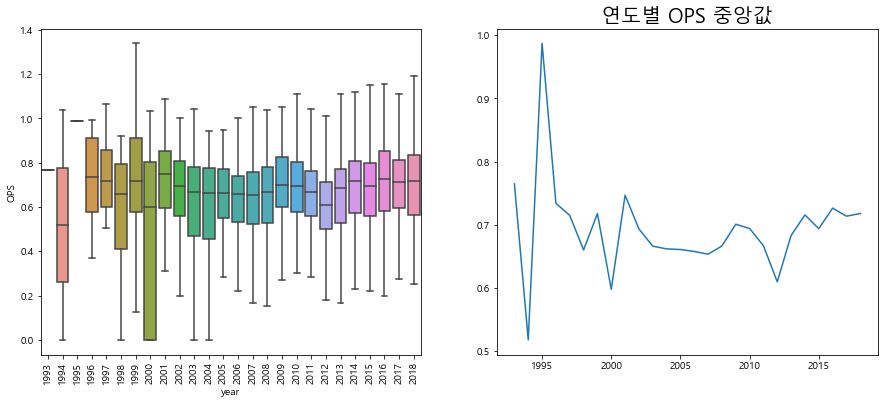

In [12]:
plt.figure(figsize = (15, 6))
plt.subplot(1, 2, 1)
g = sns.boxplot(x = "year", y = "OPS", data = regular_season_df, showfliers = False)
g.set_xticklabels(g.get_xticklabels(), rotation = 90)
plt.subplot(1, 2, 2)
plt.plot(regular_season_df.groupby('year')['OPS'].median())
plt.title('연도별 OPS 중앙값', size = 20)
plt.show()

In [13]:
pd.crosstab(regular_season_df['year'], 'count').T

year,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
col_0,,,,,,,,,,,,,,,,,,,,,
count,1,2,1,7,8,10,14,20,32,43,...,124,130,151,174,194,186,207,213,217,227


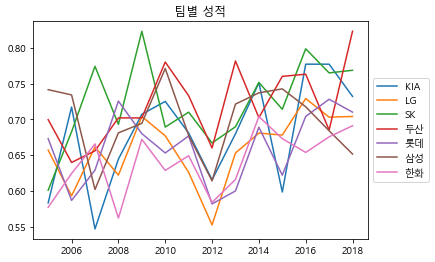

In [14]:
# 연도별 팀의 OPS 중앙값 계산
med_OPS_team = regular_season_df.pivot_table(index = ['team'], columns = 'year', 
                                            values='OPS', aggfunc='median')

# 2005년 이후 결측치가 존재하지 않는 팀만 확인
team_idx = med_OPS_team.loc[:, 2005:].isna().sum(axis = 1) <= 0

plt.plot(med_OPS_team.loc[team_idx, 2005:].T)
plt.legend(med_OPS_team.loc[team_idx, 2005:].T.columns,
            loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.title('팀별 성적')
plt.show()            

In [15]:
### 키와 몸무개 변수를 이용해 성적과 연관성이 있는지 확인
import re

regular_season_df['weight'] = regular_season_df['height/weight'].apply(
    lambda x : int(re.findall('\d+', x.split('/')[1])[0]) if pd.notnull(x) else x
)

regular_season_df['height'] = regular_season_df['height/weight'].apply(
    lambda x : int(re.findall('\d+', x.split('/')[0])[0]) if pd.notnull(x) else x
)

print(regular_season_df['height/weight'][0], regular_season_df['height'][0], regular_season_df['weight'][0])

177cm/93kg 177.0 93.0


c:\Users\jswoo\Desktop\Repository\Study_Data_Science\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\Users\jswoo\Desktop\Repository\Study_Data_Science\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


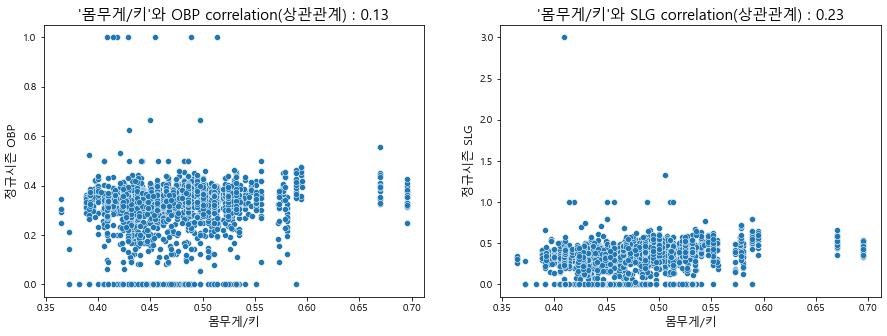

In [16]:
### 키와 몸무게를 분리하고 몸무게를 키로 나눈 새로운 변수도 만듦
### 몸무게를 키로 나눈 값이 크면 힘이 셀 것이고 낮으면 스피드가 빠를 것이라 추측
### 따라서 힘과 연관성이 높은 장타율과의 상관관계, 출루율과의 상관관계 확인

regular_season_df['weight_per_height'] = regular_season_df['weight'] / regular_season_df['height']

plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)

### 몸무게/키와 정규시즌 OBP 상관관계
correlation = regular_season_df['weight_per_height'].corr(regular_season_df['OBP'])
sns.scatterplot(regular_season_df['weight_per_height'], regular_season_df['OBP'])

plt.title("'몸무게/키'와 OBP correlation(상관관계) : " + str(np.round(correlation, 2)), fontsize = 15)
plt.ylabel('정규시즌 OBP', fontsize = 12)
plt.xlabel('몸무게/키', fontsize = 12)
plt.subplot(1, 2, 2)

### 몸무게/키와 정규시즌 SLG 상관관계
correlation =  regular_season_df['weight_per_height'].corr(regular_season_df['SLG'])
sns.scatterplot(regular_season_df['weight_per_height'], regular_season_df['SLG'])

plt.title("'몸무게/키'와 SLG correlation(상관관계) : "  + str(np.round(correlation, 2)), fontsize = 15)
plt.ylabel('정규시즌 SLG', fontsize = 12)
plt.xlabel('몸무게/키', fontsize = 12)
plt.show()

### 위 그래프 결과 해석
- 선형적인 모습을 띠지 않으며 분포가 매우 고르게 분포돼 있음 
- 이는 몸무게 및 키가 장타율과 출루율에 영향을 끼치지 않음을 의미 

### 포지션

In [17]:
regular_season_df['position'].value_counts()

내야수(우투우타)    643
외야수(우투우타)    230
외야수(좌투좌타)    201
포수(우투우타)     189
외야수(우투좌타)    184
내야수(우투좌타)    141
내야수(좌투좌타)     36
포수(우투좌타)      14
내야수(우투양타)      7
외야수(우투양타)      7
Name: position, dtype: int64

In [18]:
### 데이터 분리
regular_season_df['pos'] = regular_season_df['position'].apply(
    lambda x : x.split('(')[0] if pd.notnull(x) else x
)

regular_season_df['hit_way'] = regular_season_df['position'].apply(
    lambda x : x[-3:-1] if pd.notnull(x) else x
)

print(regular_season_df['position'][0], regular_season_df['pos'][0], regular_season_df['hit_way'][0])

내야수(우투우타) 내야수 우타


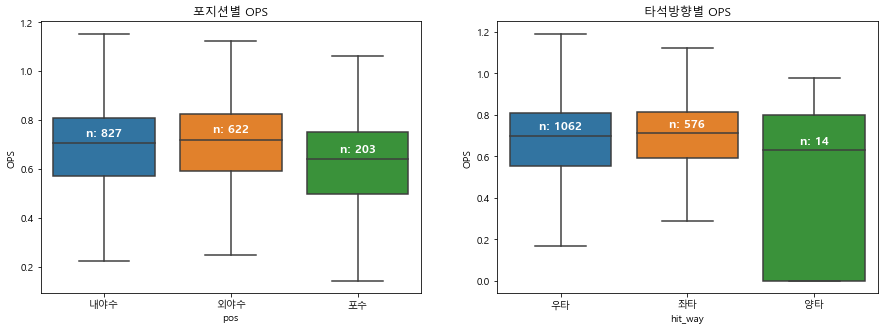

In [19]:
plt.figure(figsize = (15, 5)) 
plt.subplot(1, 2, 1) 
ax = sns.boxplot(x = 'pos', y = 'OPS', data = regular_season_df, showfliers = False)

medians = regular_season_df.groupby(['pos'])['OPS'].median().to_dict()

nobs = regular_season_df['pos'].value_counts().to_dict()

# 키 값을 'n: 값' 형식으로 변환
for key in nobs : nobs[key] = "n: " + str(nobs[key])

# 그래프의 Xticks texts 값 얻기
xticks_labels = [item.get_text() for item in ax.get_xticklabels()]

# tick은 tick의 위치, label은 그에 해당하는 text 값
for label in ax.get_xticklabels() : 
    ax.text(xticks_labels.index(label.get_text()),
    medians[label.get_text()] + 0.03, nobs[label.get_text()],
    horizontalalignment = 'center', size = 'large', color = 'w', weight = 'semibold')

ax.set_title('포지션별 OPS')

plt.subplot(1, 2, 2)
ax = sns.boxplot(x = 'hit_way', y = 'OPS', data = regular_season_df, showfliers = False)

# 타자 방향별 OPS 중앙값
medians = regular_season_df.groupby(['hit_way'])['OPS'].median().to_dict()

# 타자 방향 관측치 수
nobs = regular_season_df['hit_way'].value_counts().to_dict()

for key in nobs : nobs[key] = "n: " + str(nobs[key])

xticks_labels = [item.get_text() for item in ax.get_xticklabels()]

for label in ax.get_xticklabels():
    ax.text(xticks_labels.index(label.get_text()), medians[label.get_text()] + 0.03, 
    nobs[label.get_text()], horizontalalignment = 'center', size = 'large',
    color = 'w', weight = 'semibold')

ax.set_title('타석방향별 OPS')
plt.show()


### 위 그래프 해석
- 포지션별 OPS 값 확인 -> 내야수와 외야수의 성적 차이는 크게 없지만 포수의 OPS는 타포지션 보다 다소 작은 편
- 우타자 좌타자인지에 따른 OPS 값은 큰 차이가 없음 
- 양손타자는 관측치가 13개 밖에 없어 신뢰도가 낮음

### 외국인과 내국인을 구별해 데이터 탐색

In [20]:
regular_season_df['career'].head()

0    쿠바 Ciego de Avila Maximo Gomez Baez(대)
1                         광주대성초-광주동성중-광주동성고
2                         광주대성초-광주동성중-광주동성고
3                         광주대성초-광주동성중-광주동성고
4                         광주대성초-광주동성중-광주동성고
Name: career, dtype: object

In [21]:
# career를 split 
foreign_country = regular_season_df['career'].apply(
    lambda x : x.replace('-', ' ').split(' ')[0]
)

# 외국만 추출
foreign_country_list = list(set(foreign_country.apply(
    lambda x : np.nan if '초' in x else x 
)))

# 결측치 처리
foreign_country_list = [x for x in foreign_country_list if str(x) != 'nan']
foreign_country_list

['미국', '도미니카', '쿠바', '네덜란드', '캐나다']

In [22]:
## 국적을 의미하는 변수 추가 
regular_season_df['country'] = foreign_country 
regular_season_df['country'] = regular_season_df['country'].apply(
    lambda x : x if pd.isnull(x) 
        else ('foreign' if x in foreign_country_list else 'korean')
)

regular_season_df[['country']].head()

,country
0,foreign
1,korean
2,korean
3,korean
4,korean


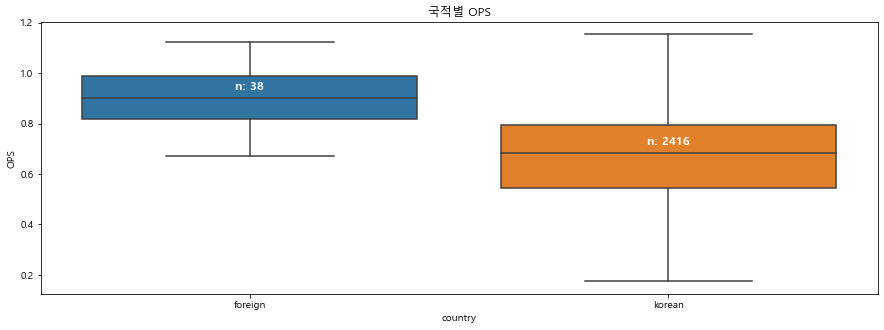

In [23]:
plt.figure(figsize=(15,5)) # 그래프 크기 조정
ax = sns.boxplot(x='country', y='OPS', data = regular_season_df, showfliers=False)

# 내외국인 별 OPS 중앙값 dict
medians = regular_season_df.groupby(['country'])['OPS'].median().to_dict()
# 내외국인 관측치 수 dict
nobs = regular_season_df['country'].value_counts().to_dict()
# 키 값을 'n: 값' 형식으로 변환 
for key in nobs: nobs[key] = "n: " + str(nobs[key])

# 그래프의 Xticks text 값 얻기
xticks_labels = [item.get_text() for item in ax.get_xticklabels()]
    
for label in ax.get_xticklabels(): # tick은 tick의 위치, label은 그에 해당하는 text 값 
    ax.text(xticks_labels.index(label.get_text()), medians[label.get_text()] + 0.03, \
            nobs[label.get_text()], # x 좌표, y 좌표, 해당 text
            horizontalalignment='center', size='large', color='w', weight='semibold') 
ax.set_title('국적별 OPS')
plt.show()

### 결과 비교 
- 외국인 선수들이 평균적으로 내국인 선수들보다 OPS 성적이 좋은 경향을 보임 

In [24]:
# 첫 연봉
regular_season_df['starting_salary'].value_counts()

10000만원     177
6000만원      117
3000만원      105
9000만원       97
5000만원       91
8000만원       89
30000만원      74
12000만원      62
4000만원       62
18000만원      54
7000만원       53
11000만원      49
13000만원      48
20000만원      46
25000만원      45
15000만원      41
16000만원      28
14000만원      26
28000만원      20
43000만원      17
45000만원      16
27000만원      15
21000만원      13
23000만원      12
6500만원       10
33000만원      10
100000달러      4
300000달러      3
50000달러       2
17000만원       1
Name: starting_salary, dtype: int64

c:\Users\jswoo\Desktop\Repository\Study_Data_Science\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\jswoo\Desktop\Repository\Study_Data_Science\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


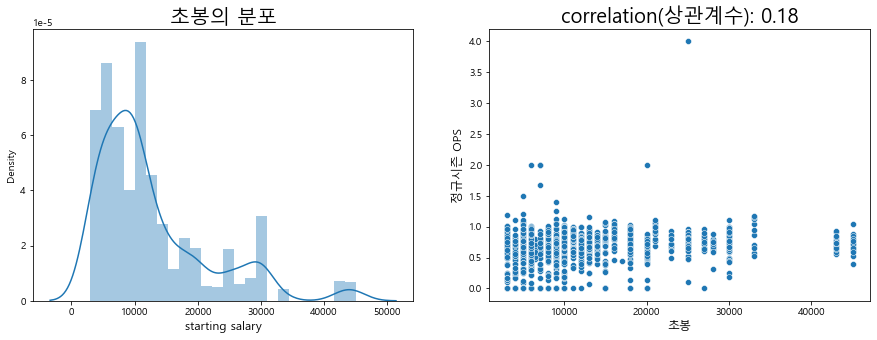

In [25]:
# 결측치라면 그대로 0으로 두고 ‘만원’이 포함되어 있다면 숫자만 뽑아서 초봉으로 넣어준다. 
# 그외 만 원 단위가 아닌 초봉은 결측치로 처리한다.
regular_season_df['starting_salary'] = regular_season_df['starting_salary'].apply(
    lambda x: x if pd.isnull(x)
                else(int(re.findall('\d+',x)[0]) if '만원' in x else np.nan))

plt.figure(figsize=(15,5)) # 그래프 크기 조정
plt.subplot(1,2,1) # 1행 2열의 첫 번째(1행, 1열) 그래프
b=sns.distplot(regular_season_df['starting_salary']. \
               loc[regular_season_df['starting_salary'].notnull()], hist=True)
b.set_xlabel("starting salary",fontsize=12)
b.set_title('초봉의 분포', fontsize=20)

plt.subplot(1,2,2) # 1행 2열의 두 번째(1행, 2열) 그래프

# 정규시즌과 프리시즌의 상관관계 계산
correlation = regular_season_df['starting_salary'].corr(regular_season_df['OPS'])
b = sns.scatterplot(regular_season_df['starting_salary'], regular_season_df['OPS'])
b.axes.set_title('correlation(상관계수): '+str(np.round(correlation,2)), fontsize=20)
b.set_ylabel("정규시즌 OPS",fontsize=12)
b.set_xlabel("초봉",fontsize=12)
plt.show()

### 일별 데이터 분석

In [26]:
day_by_day_df = pd.read_csv(
    '..\ch01\data\Regular_Season_Batter_Day_by_Day_b4.csv')
display(day_by_day_df.shape, day_by_day_df.head())


(112273, 20)

,batter_id,batter_name,date,opposing_team,avg1,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,HBP,SO,GDP,avg2,year
0,0,가르시아,3.24,NC,0.333,3,1,1,0,0,0,0,0,0,1,0,1,0,0.333,2018
1,0,가르시아,3.25,NC,0.000,4,0,0,0,0,0,0,0,0,0,0,1,0,0.143,2018
2,0,가르시아,3.27,넥센,0.200,5,0,1,0,0,0,0,0,0,0,0,0,0,0.167,2018
3,0,가르시아,3.28,넥센,0.200,5,1,1,0,0,0,1,0,0,0,0,0,0,0.176,2018
4,0,가르시아,3.29,넥센,0.250,4,0,1,0,0,0,3,0,0,0,0,0,1,0.190,2018


- 연도는 정확히 표시돼 있지만, 날짜는 월과 일이 함께 표현되어 있음
- date라는 변수를 사용하여 월, 일 분리

In [27]:
# 날짜(date)를 '.'을 기준으로 나누고 첫 번째 값을 month로 지정
day_by_day_df['month'] = day_by_day_df['date'].apply(lambda x : str(x).split('.')[0])

# 각 연도의 월별 평균 누적 타율(avg2) 계산 
agg_df = day_by_day_df.groupby(['year', 'month'])['avg2'].mean().reset_index() 

# pivot_table을 이용해 데이터 변형
agg_df = agg_df.pivot_table(index = ['month'], columns = 'year', values = 'avg2')
agg_df

year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
month,,,,,,,,,,,,,,,,,,
10,0.356400,0.269065,0.216583,0.203636,NaN,0.260985,0.249888,0.249638,0.033333,NaN,0.243526,0.246949,0.257841,0.273537,0.274042,0.282547,0.280289,0.277482
3,NaN,NaN,NaN,NaN,NaN,0.261714,0.261714,0.271982,NaN,0.239861,NaN,NaN,0.231236,0.210598,0.214485,0.257857,0.161979,0.238015
4,0.205217,0.319792,0.250296,0.259663,0.235317,0.267106,0.215703,0.261531,0.252546,0.262953,0.247133,0.234199,0.267994,0.259918,0.255175,0.266711,0.259430,0.263953
5,0.297157,0.267990,0.241491,0.237954,0.253527,0.264283,0.237329,0.262535,0.280842,0.272934,0.250877,0.247844,0.268355,0.273899,0.261307,0.275240,0.274374,0.274083
6,0.306926,0.275867,0.252290,0.248800,0.249913,0.264392,0.260600,0.270766,0.278781,0.274791,0.263264,0.254577,0.270533,0.283480,0.268999,0.276307,0.279060,0.280630
7,0.293171,0.266650,0.244230,0.251973,0.256396,0.262464,0.259171,0.264870,0.275054,0.265501,0.264829,0.261513,0.262812,0.275677,0.272685,0.283192,0.284565,0.280817
8,0.303489,0.270481,0.252319,0.249460,0.243570,0.265369,0.270258,0.265173,0.271796,0.271075,0.262048,0.258069,0.268122,0.282025,0.272377,0.283105,0.283283,0.283923
9,0.308636,0.248333,0.243780,0.203953,0.237058,0.258794,0.251022,0.252942,0.264468,0.265312,0.258500,0.251232,0.260571,0.272411,0.271629,0.276513,0.273213,0.277841


- 결측치 존재 하는 것을 확인 -> 연도마다 시즌의 시작일과 종료일이 다르기 때문에 발생 추측

### 연도와 월별 성적 변화 시각화

year,2011,2012,2013,2014,2015,2016,2017,2018
month,,,,,,,,
4,0.247133,0.234199,0.267994,0.259918,0.255175,0.266711,0.259430,0.263953
5,0.250877,0.247844,0.268355,0.273899,0.261307,0.275240,0.274374,0.274083
6,0.263264,0.254577,0.270533,0.283480,0.268999,0.276307,0.279060,0.280630
7,0.264829,0.261513,0.262812,0.275677,0.272685,0.283192,0.284565,0.280817
8,0.262048,0.258069,0.268122,0.282025,0.272377,0.283105,0.283283,0.283923
9,0.258500,0.251232,0.260571,0.272411,0.271629,0.276513,0.273213,0.277841


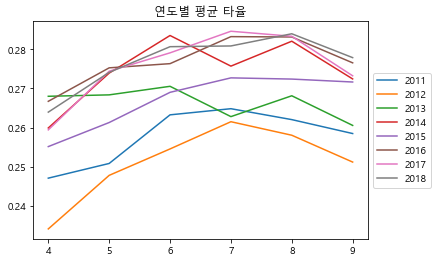

In [28]:
display(agg_df.iloc[2:, 10:])
plt.plot(agg_df.iloc[2:, 10:]) # 2011 ~ 2018년 데이터만 사용
plt.legend(agg_df.iloc[2:, 10:].columns, 
           loc = 'center left', bbox_to_anchor = (1, 0.5)) # 범례 그래프 밖에 위치

plt.title('연도별 평균 타율')
plt.show()

### 탐색적 데이터 분석 요약
1. 프리시즌 데이터 분석 
    - 데이터양에 있어 충분하지 못함 
    - 정규시즌에 있는 선수의 기록이 프리시즌에 존재하지 않는 경우도 있었음 
    - 프리시즌의 데이터와 정규시즌의 데이터 간에 상관성이 매우 낮았음
    - 결론 : 프리시즌 데이터는 사용하지 않음 
-
2. 정규시즌 데이터 분석
    - OPS가 외국인 여부에 따라 다르게 분포함을 파악 
    - 일별 데이터에서 연도별 월별 선수들의 누적 성적의 변화를 봄 
    - 결론 : OPS 성적의 월별로 달라지고 7월 이후에 성적이 수렴되는 것을 확인 

# 데이터 전처리 
- 데이터 전처리란 분석과 예측 모델링 작업을 진행할 수 이게 데이터를 정제하고 변환하는 모든 작업을 의미
- 데이터가 비어 있는 결측치의 처리와 잘못된 데이터라고 판단되는 데이터의 오류 처리 

### 결측치 처리 및 데이터 오류 처리 
- 데이터 수집 과정이나 환경 문제로 결측치나 오류 발생 가능
- 데이터 타입에 따라 결측치 처리 방법이 달라질 수 있으므로 수치형 타입의 변수만 따로 추출해 결측치 처리

In [29]:
pd.DataFrame(regular_season_df.isna().sum()).transpose()

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,position,career,starting_salary,OPS,weight,height,weight_per_height,pos,hit_way,country
0,0,0,0,0,26,0,0,0,0,0,...,802,0,1076,26,802,802,802,802,802,0


In [31]:
# 수치형 타입의변수 저장
numerics = [
    'int16', 'int32', 'int64', 'float16', 'float32', 'float64'
] # 모든 numeric(수치형) 타입

num_cols = regular_season_df.select_dtypes(include = numerics).columns 

# 수치형 타입 변수 중 결측치가 하나라도 존재하는 행 출력
# isna().sum(axis = 1) -> 열 기준의 결측치 개수
# df.loc[]를 통해 결측치 0개 이상 데이터를 추출
regular_season_df.loc[regular_season_df[num_cols].isna().sum(axis =1) >0, num_cols].head()

,batter_id,year,avg,G,AB,R,H,2B,3B,HR,...,SO,GDP,SLG,OBP,E,starting_salary,OPS,weight,height,weight_per_height
0,0,2018,0.339,50,183,27,62,9,0,8,...,25,3,0.519000,0.383000,9,NaN,0.902000,93.0,177.0,0.525424
12,138,2005,0.127,39,63,9,8,2,0,0,...,15,1,0.158730,0.256757,3,NaN,0.415487,NaN,NaN,NaN
13,138,2006,0.139,37,36,6,5,2,0,0,...,14,0,0.194444,0.326087,4,NaN,0.520531,NaN,NaN,NaN
14,138,2007,0.000,8,4,3,0,0,0,0,...,2,1,0.000000,0.000000,0,NaN,0.000000,NaN,NaN,NaN
15,138,2008,0.000,2,1,0,0,0,0,0,...,0,0,0.000000,0.000000,0,NaN,0.000000,NaN,NaN,NaN


In [32]:
# 수치형 변수에 포함되는 데이터 타입 선정 
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# 정규 시즌 데이터의 결측치를 0으로 대체 
# numerics라는 이름의 리스트로 수치형 변수에 해당하는 데이터 타입 선정
# 수치형 변수 중 결측치는 모두 0으로 바꿈
regular_season_df[regular_season_df.select_dtypes(include = numerics).columns] = \
        regular_season_df[regular_season_df.select_dtypes(include = numerics).columns].fillna(0)

regular_season_df

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,position,career,starting_salary,OPS,weight,height,weight_per_height,pos,hit_way,country
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),0.0,0.902,93.0,177.0,0.525424,내야수,우타,foreign
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.000,72.0,180.0,0.400000,내야수,좌타,korean
2,1,강경학,2014,한화,0.221,41,86,11,19,2,...,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.686,72.0,180.0,0.400000,내야수,좌타,korean
3,1,강경학,2015,한화,0.257,120,311,50,80,7,...,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.673,72.0,180.0,0.400000,내야수,좌타,korean
4,1,강경학,2016,한화,0.158,46,101,16,16,3,...,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000.0,0.489,72.0,180.0,0.400000,내야수,좌타,korean
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2449,344,황진수,2014,롯데,0.000,5,5,0,0,0,...,내야수(우투양타),석천초-대헌중-공주고,4000.0,0.000,82.0,181.0,0.453039,내야수,양타,korean
2450,344,황진수,2015,롯데,0.000,2,2,0,0,0,...,내야수(우투양타),석천초-대헌중-공주고,4000.0,0.000,82.0,181.0,0.453039,내야수,양타,korean
2451,344,황진수,2016,롯데,0.000,11,10,2,0,0,...,내야수(우투양타),석천초-대헌중-공주고,4000.0,0.000,82.0,181.0,0.453039,내야수,양타,korean
2452,344,황진수,2017,롯데,0.291,60,117,18,34,6,...,내야수(우투양타),석천초-대헌중-공주고,4000.0,0.761,82.0,181.0,0.453039,내야수,양타,korean


In [33]:
# 일별 데이터에서 결측치를 0으로 채우기
day_by_day_df[day_by_day_df.select_dtypes(include = numerics).columns] = \
    day_by_day_df[day_by_day_df.select_dtypes(include = numerics).columns].fillna(0)

day_by_day_df

,batter_id,batter_name,date,opposing_team,avg1,AB,R,H,2B,3B,...,RBI,SB,CS,BB,HBP,SO,GDP,avg2,year,month
0,0,가르시아,3.24,NC,0.333,3,1,1,0,0,...,0,0,0,1,0,1,0,0.333,2018,3
1,0,가르시아,3.25,NC,0.000,4,0,0,0,0,...,0,0,0,0,0,1,0,0.143,2018,3
2,0,가르시아,3.27,넥센,0.200,5,0,1,0,0,...,0,0,0,0,0,0,0,0.167,2018,3
3,0,가르시아,3.28,넥센,0.200,5,1,1,0,0,...,1,0,0,0,0,0,0,0.176,2018,3
4,0,가르시아,3.29,넥센,0.250,4,0,1,0,0,...,3,0,0,0,0,0,1,0.190,2018,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112268,344,황진수,6.23,LG,-,0,0,0,0,0,...,0,0,0,1,0,0,0,0.158,2018,6
112269,344,황진수,6.26,넥센,0.000,1,0,0,0,0,...,0,0,0,0,0,1,0,0.150,2018,6
112270,344,황진수,6.27,넥센,0.500,2,1,1,1,0,...,0,0,0,0,0,1,0,0.182,2018,6
112271,344,황진수,6.28,넥센,-,0,0,0,0,0,...,0,0,0,0,0,0,0,0.182,2018,6


In [34]:
# 프리시즌 데이터에서 결측치 0으로 채우기
preseason_df[preseason_df.select_dtypes(include = numerics).columns] = \
    preseason_df[preseason_df.select_dtypes(include = numerics).columns].fillna(0)

preseason_df

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS,new_idx
0,0,가르시아,2018,LG,0.350,7,20,1,7,1,...,0.550,0.409,1,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.959,가르시아2018
1,1,강경학,2011,한화,0.000,4,2,2,0,0,...,0.000,0.500,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.500,강경학2011
2,1,강경학,2014,한화,-,4,0,2,0,0,...,0.000,0.000,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000,강경학2014
3,1,강경학,2015,한화,0.130,10,23,3,3,0,...,0.130,0.286,2,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.416,강경학2015
4,1,강경학,2016,한화,0.188,14,32,4,6,1,...,0.281,0.212,0,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.493,강경학2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1388,342,황재균,2014,롯데,0.407,10,27,3,11,2,...,0.593,0.448,1,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,1.041,황재균2014
1389,342,황재균,2015,롯데,0.333,11,30,8,10,3,...,0.433,0.389,0,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.822,황재균2015
1390,342,황재균,2016,롯데,0.310,16,42,8,13,3,...,0.429,0.370,1,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.799,황재균2016
1391,342,황재균,2018,KT,0.250,6,16,3,4,1,...,0.500,0.333,3,183cm/96kg,1987년 07월 28일,내야수(우투우타),사당초-이수중-경기고-현대-우리-히어로즈-넥센-롯데-샌프란시스코,6000만원,0.833,황재균2018
